<a href="https://colab.research.google.com/github/simon-clematide/colab-notebooks-for-teaching/blob/main/openai_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilingual Word Embeddings with OpenAI's Embedders

## Installation


In [4]:
! pip install openai

In [5]:
# for cosine distance, dimension reduction and visualization
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Setting up the API client

In [6]:
import openai
from openai import OpenAI

# we use colab userdata secrets to avoid accidental leaking of API KEYS
from google.colab import userdata

# Create
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

## Embed single words separately

In [7]:
def get_embedding(word, model="text-embedding-3-large"):
   return client.embeddings.create(input = word, model=model).data[0].embedding

## Find nearest neighbors of words in vector space

In [8]:
def find_nearest_neighbors(words, embeddings):
    """
    Finds the nearest neighbor in the embedding space for each word.

    Parameters:
    words (List[str]): List of words.
    embeddings (List[List[float]]): List of embeddings, where each embedding is a list of floats.

    Returns:
    numpy.ndarray: Distance between each word
    """
    # Convert the list of embeddings into a NumPy array for efficient calculations
    embeddings_array = np.array(embeddings)

    # Calculate the pairwise cosine distances between all embeddings
    distances = cosine_distances(embeddings_array)

    # Find the nearest neighbor for each word
    for index, word in enumerate(words):
        # Set the distance to the current word to infinity to exclude it from the search
        distances[index, index] = np.inf

        # Find the index of the nearest neighbor
        nearest_neighbor_index = np.argmin(distances[index])

        # Find the cosine distance to the nearest neighbor
        nearest_neighbor_distance = distances[index, nearest_neighbor_index]

        # Find the nearest word based on the index
        nearest_neighbor_word = words[nearest_neighbor_index]

        # Output the current word, its nearest neighbor, and the distance
        print(f"{word}, {nearest_neighbor_word}, {nearest_neighbor_distance:.2f}")
    return distances


In [9]:
peace = get_embedding("peace", model='text-embedding-3-small')
war = get_embedding("war", model='text-embedding-3-small')
tomato = get_embedding("tomato", model='text-embedding-3-small')
banana = get_embedding("banana", model='text-embedding-3-small')
print(len(banana))

1536


In [10]:
d = find_nearest_neighbors(["peace","war","tomato","banana"], [peace,war,tomato, banana])

peace, war, 0.59
war, peace, 0.59
tomato, banana, 0.59
banana, tomato, 0.59


In [11]:
print(d)

[[       inf 0.5889815  0.79566086 0.7766664 ]
 [0.5889815         inf 0.78254953 0.817482  ]
 [0.79566086 0.78254953        inf 0.593381  ]
 [0.7766664  0.817482   0.593381          inf]]


## Visualization in 2D

In [12]:
def embed_words_and_plot_pca(words, model_name='text-embedding-3-small'):
    """
    Embeds a list of words using an OpenAI model and plots a PCA visualization of the embeddings in 2D space.

    Parameters:
    words (List[str]): List of words to embed and plot.
    model_name (str): Name of the OpenAI model to use for embedding.

    Returns:
    None: Displays a PCA plot of the word embeddings.
    """
    embeddings = []
    for word in words:
        # Assuming get_embedding is a predefined function to fetch embeddings from an OpenAI model
        embedding = get_embedding(word, model=model_name)
        embeddings.append(embedding)

    # Convert embeddings list to a NumPy array for PCA
    embeddings_array = np.array(embeddings)

    # PCA reduction to 2D for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_array)

    # Plotting the 2D embeddings
    plt.figure(figsize=(8, 6))
    for i, emb in enumerate(embeddings_2d):
        plt.scatter(emb[0], emb[1], label=words[i])
        plt.text(emb[0] + 0.01, emb[1] + 0.01, words[i])

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA visualization of embeddings in 2D space')
    plt.legend()
    plt.grid(True)
    plt.show()




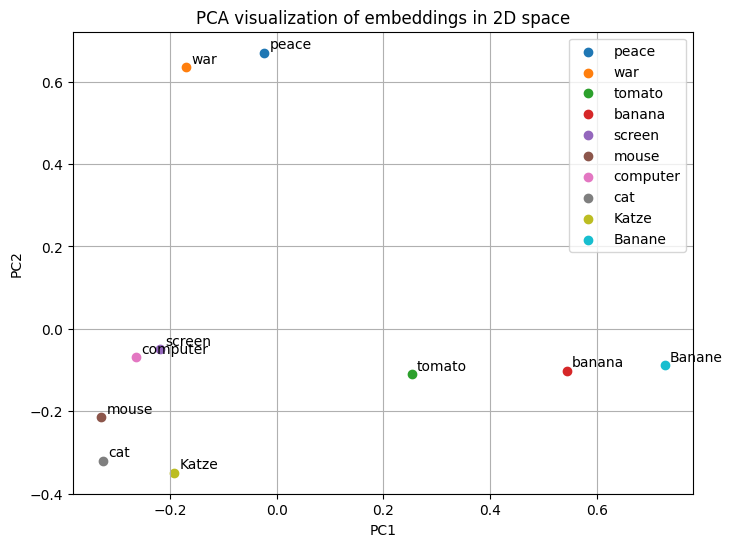

In [13]:
# Example usage
words = ['peace', 'war', 'tomato', 'banana', 'screen', 'mouse', 'computer', 'cat', 'Katze', 'Banane']
embed_words_and_plot_pca(words)

In [ ]:
# prompt: Can you generate a gradio app with the code above, where a user can just enter words, and they will be embedded and visualized

!pip install gradio

import gradio as gr
import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import openai
from openai import OpenAI
from google.colab import userdata

# Create
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

# ... (rest of your code from the previous response) ...

def embed_words_and_visualize(words_str):
    """
    Embeds a list of words using an OpenAI model and plots a PCA visualization of the embeddings in 2D space.

    Parameters:
    words_str (str): A string containing words separated by spaces.

    Returns:
    str: Path to the generated plot image.
    """
    words = words_str.split()
    embeddings = []
    for word in words:
        embedding = get_embedding(" "+word, model='text-embedding-3-large')
        embeddings.append(embedding)

    embeddings_array = np.array(embeddings)
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_array)

    plt.figure(figsize=(8, 6))
    for i, emb in enumerate(embeddings_2d):
        plt.scatter(emb[0], emb[1], label=words[i])
        plt.text(emb[0] + 0.01, emb[1] + 0.01, words[i])

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA visualization of embeddings in 2D space')
    plt.legend()
    plt.grid(True)
    plt.savefig('plot.png')  # Save the plot to a file
    plt.close()
    return 'plot.png'

# Create the Gradio interface
demo = gr.Interface(
    fn=embed_words_and_visualize,
    inputs=gr.Textbox(lines=5, placeholder="Enter words separated by spaces"),
    outputs="image",
    title="Word Embedding Visualization",
    description="Enter words and see their embeddings visualized in 2D space."
)

# Launch the interface
demo.launch(share=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 4.8 MB/s eta 0:00:00


In [ ]:
# prompt: How can I see with OpenAI embedding whether the word was encoded as a single word?

def get_embedding(word, model="text-embedding-3-large"):
   """
   Gets the embedding for a given word using the specified OpenAI model.

   Parameters:
   word (str): The word to embed.
   model (str): The name of the OpenAI model to use for embedding.

   Returns:
   list: The embedding for the word.
   """
   # Add a space before the word to ensure it's treated as a single word
   return client.embeddings.create(input = [" " + word], model=model).data[0].embedding


In [ ]:
# prompt: How can I show the subtokens of an embedded word?

def get_embedding_with_tokens(word, model="text-embedding-3-large"):
  """
  Gets the embedding for a given word using the specified OpenAI model and returns the subtokens.

  Parameters:
  word (str): The word to embed.
  model (str): The name of the OpenAI model to use for embedding.

  Returns:
  dict: A dictionary containing the embedding and the subtokens.
  """
  response = client.embeddings.create(input = [" " + word], model=model)
  embedding = response.data[0].embedding
  tokens = response.data[0].usage.prompt_tokens
  return {"embedding": embedding, "tokens": tokens}


In [ ]:
get_embedding_with_tokens(" Banane")


In [ ]:

import tiktoken
def get_embedding_with_tokens(word, model="text-embedding-3-large"):
    """
    Gets the embedding for a given word using the OpenAI client and returns the subtokens.

    Parameters:
    word (str): The word to embed.
    model (str): The name of the OpenAI model to use for embedding.

    Returns:
    dict: A dictionary containing the embedding and the tokens (subtokens).
    """
    # Use the OpenAI client to get the embedding
    response = client.embeddings.create(input=word, model=model)

    # Extract the embedding from the response object
    embedding = response.data[0].embedding  # Access as an attribute

    # Use tiktoken to get the tokens (subtokens)
    tokenizer = tiktoken.encoding_for_model(model)  # Initialize the tokenizer for the model
    tokens = tokenizer.encode(word)  # Tokenize the word

    # Decode tokens back into their string representation (optional, to see the subtokens)
    decoded_tokens = [tokenizer.decode([token]) for token in tokens]

    # Return both the embedding and the subtokens (decoded tokens)
    return { "tokens": decoded_tokens,"embedding": embedding}


In [ ]:
result = get_embedding_with_tokens("Wiederherstellungskosten")
print(result)

In [ ]:
# prompt: embed 2 words and give the vector similarity back, create a function

import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def get_vector_similarity(word1, word2, model="text-embedding-3-large"):
  """
  Embeds two words and calculates the cosine similarity between their embeddings.

  Args:
    word1 (str): The first word.
    word2 (str): The second word.
    model (str): The OpenAI model to use for embedding.

  Returns:
    float: The cosine similarity between the embeddings of the two words.
  """
  embedding1 = get_embedding(word1, model=model)
  embedding2 = get_embedding(word2, model=model)
  similarity = cosine_similarity([embedding1], [embedding2])[0][0]
  return similarity


In [ ]:
get_vector_similarity("Katze", "Katzen")


In [ ]:
# prompt: Create an analogy function: word A is to word B as word C to ...

import numpy as np
def find_analogous_word(word_a, word_b, word_c, words_list, model="text-embedding-3-large"):
    """
    Finds the word most analogous to word_c in the context of the analogy word_a is to word_b.

    Args:
      word_a (str): The first word in the analogy.
      word_b (str): The second word in the analogy.
      word_c (str): The third word in the analogy.
      words_list (list): A list of candidate words to find the analogous word from.
      model (str): The OpenAI model to use for embedding.

    Returns:
      str: The word most analogous to word_c.
    """
    # Get embeddings for all words
    embedding_a = get_embedding(word_a, model=model)
    embedding_b = get_embedding(word_b, model=model)
    embedding_c = get_embedding(word_c, model=model)

    # Calculate the difference between the embeddings of word_a and word_b
    diff_ab = np.array(embedding_b) - np.array(embedding_a)

    # Find the word in words_list that has the most similar embedding to word_c + diff_ab
    best_word = None
    best_similarity = -float('inf')
    for word in words_list:
        embedding_word = get_embedding(word, model=model)
        similarity = cosine_similarity([np.array(embedding_c) + diff_ab], [embedding_word])[0][0]
        if similarity > best_similarity:
            best_similarity = similarity
            best_word = word

    return best_word


In [ ]:
find_analogous_word("man", "king", "woman", ["queen", "princess", "prince","queens"])

In [ ]:
# prompt: Create a gradio app for the analogy game, also draw all words in an PCA embedding space (2D). Also draw a line of the transition in the embedding space.

import numpy as np
from sklearn.metrics.pairwise import cosine_distances
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import openai
from openai import OpenAI
from google.colab import userdata
import gradio as gr
import tiktoken
from sklearn.metrics.pairwise import cosine_similarity

# Create
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

def get_embedding(word, model="text-embedding-3-small"):
   """
   Gets the embedding for a given word using the specified OpenAI model.

   Parameters:
   word (str): The word to embed.
   model (str): The name of the OpenAI model to use for embedding.

   Returns:
   list: The embedding for the word.
   """
   # Add a space before the word to ensure it's treated as a single word
   return client.embeddings.create(input = [" " + word], model=model).data[0].embedding


def find_analogous_word_and_visualize(word_a, word_b, word_c, words_list, model="text-embedding-3-large"):
    """
    Finds the word most analogous to word_c in the context of the analogy word_a is to word_b and visualizes the embeddings.

    Args:
      word_a (str): The first word in the analogy.
      word_b (str): The second word in the analogy.
      word_c (str): The third word in the analogy.
      words_list (list): A list of candidate words to find the analogous word from.
      model (str): The OpenAI model to use for embedding.

    Returns:
      str: The word most analogous to word_c.
      str: Path to the generated plot image.
    """
    # Get embeddings for all words
    embedding_a = get_embedding(word_a, model=model)
    embedding_b = get_embedding(word_b, model=model)
    embedding_c = get_embedding(word_c, model=model)
    embeddings = [embedding_a, embedding_b, embedding_c]
    words = [word_a, word_b, word_c]

    # Calculate the difference between the embeddings of word_a and word_b
    diff_ab = np.array(embedding_b) - np.array(embedding_a)

    # Find the word in words_list that has the most similar embedding to word_c + diff_ab
    best_word = None
    best_similarity = -float('inf')
    words_list = words_list.split()
    for word in words_list:
        embedding_word = get_embedding(word, model=model)
        similarity = cosine_similarity([np.array(embedding_c) + diff_ab], [embedding_word])[0][0]
        if similarity > best_similarity:
            best_similarity = similarity
            best_word = word

    # Get embeddings for all words including the best word
    for word in words_list:
        embedding_word = get_embedding(word, model=model)
        embeddings.append(embedding_word)
        words.append(word)

    # Convert embeddings list to a NumPy array for PCA
    embeddings_array = np.array(embeddings)

    # PCA reduction to 2D for visualization
    pca = PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings_array)

    # Plotting the 2D embeddings
    plt.figure(figsize=(8, 6))
    for i, emb in enumerate(embeddings_2d):
        plt.scatter(emb[0], emb[1], label=words[i])
        plt.text(emb[0] + 0.01, emb[1] + 0.01, words[i])

    # Draw a line between word_a, word_b, and word_c + diff_ab
    a_index = words.index(word_a)
    b_index = words.index(word_b)
    c_index = words.index(word_c)
    best_word_index = words.index(best_word)
    plt.plot([embeddings_2d[a_index][0], embeddings_2d[b_index][0]], [embeddings_2d[a_index][1], embeddings_2d[b_index][1]], color='red')
    plt.plot([embeddings_2d[c_index][0], embeddings_2d[best_word_index][0]], [embeddings_2d[c_index][1], embeddings_2d[best_word_index][1]], color='blue')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA visualization of embeddings in 2D space')
    plt.legend()
    plt.grid(True)
    plt.savefig('plot.png')  # Save the plot to a file
    plt.close()

    return best_word, 'plot.png'


# Create the Gradio interface
demo = gr.Interface(
    fn=find_analogous_word_and_visualize,
    inputs=[
        gr.Textbox(lines=1, placeholder="Word A"),
        gr.Textbox(lines=1, placeholder="Word B"),
        gr.Textbox(lines=1, placeholder="Word C"),
        gr.Textbox(lines=5, placeholder="Candidate words (separated by spaces)")
    ],
    outputs=[
        gr.Textbox(label="Most Analogous Word"),
        "image"
    ],
    title="Word Analogy Game",
    description="Find the most analogous word based on the given analogy."
)

# Launch the interface
demo.launch(share=True,debug=False)
